In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

## Set Parameter

In [2]:
# set params
N, n_feature = 500, 3
batch_size   = 32        # Batch size
n_batch      = N//32     # Drop Last
lr = 0.01

# Single Neuron
t_W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
t_b = np.random.uniform(-1, 1, 1)
w = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
b = np.random.uniform(-1, 1, 1).reshape(1, 1)

print('weight shape & bias shape : ', w.shape, b.shape)  # column Vector

epochs = 100

weight shape & bias shape :  (3, 1) (1, 1)


## Generate Parameter

In [3]:
# input data
x_data = np.random.randn(N, n_feature)   # Each Data : Row Vector
y_data = x_data @ t_W + t_b
y_data = (y_data > 0).astype(np.int)
print('input shape & output shape', x_data.shape, x_data.shape)


input shape & output shape (500, 3) (500, 3)


## Training

In [4]:
J_track = list()
acc_track = list()

for epoch in range(epochs):
    for b_idx in range(n_batch):
        X = x_data[b_idx*batch_size:(b_idx+1)*batch_size, ...] # (batch_size,n_feature)
        Y = y_data[b_idx*batch_size:(b_idx+1)*batch_size, ...] # (batch_size,1)
        
        # Forward Propagation
        Z = X @ w + b
        Pred = 1/(1 + np.exp(-Z))                              # Sigmoid
        J0 = -(Y*np.log(Pred) + (1-Y)*np.log(1-Pred))          # BCEE
        J = np.mean(J0)
        J_track.append(J)
        
        # Calculate accuracy for each Batch
        Pred_ = (Pred > 0.5).astype(np.int)
        n_correct = (Pred_ == Y).astype(np.int)
        acc = np.sum(n_correct)/batch_size                               
        acc_track.append(acc)

        # jacobians
        dJ_dJ0 = 1/batch_size*np.ones((1, batch_size))
        dJ0_dPred = np.diag(((Pred - Y)/(Pred*(1-Pred))).flatten())      # BCEE
        dPred_dZ = np.diag((Pred*(1-Pred)).flatten())                    # Sigmoid
        dZ_dW = X
        dZ_db = np.ones((batch_size, 1))
        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred
        dJ_dZ = dJ_dPred @ dPred_dZ
        dJ_dW = dJ_dZ @ dZ_dW
        dJ_db = dJ_dZ @ dZ_db
        # parameter update
        w = w - lr*dJ_dW.T
        b = b - lr*dJ_db

## Visualization

Text(0, 0.5, 'Accumulated Accuracy')

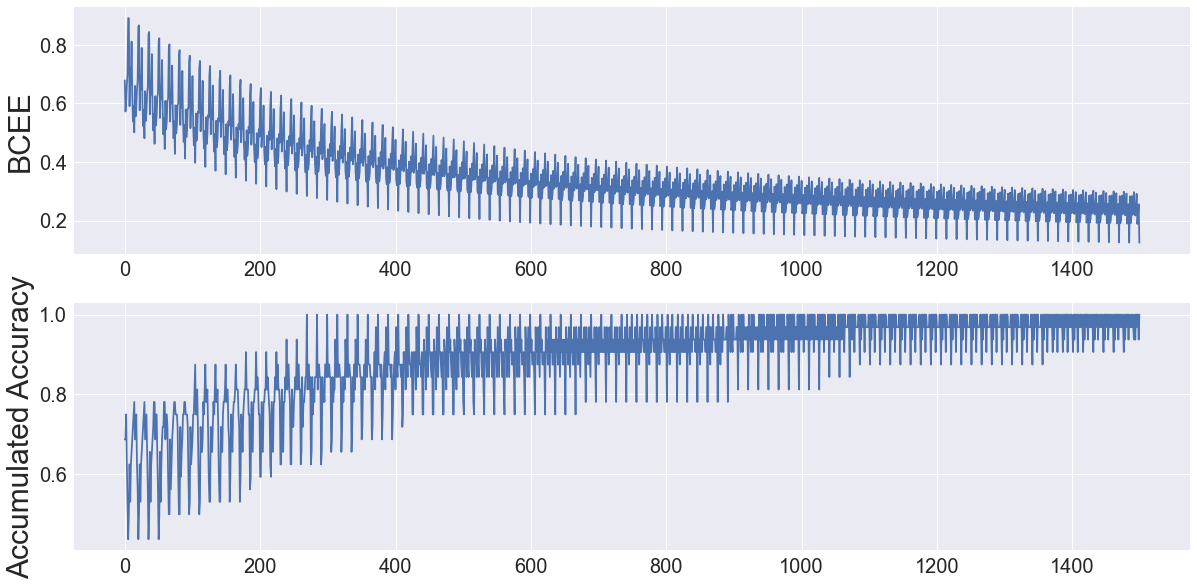

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('BCEE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].plot(acc_track)
axes[1].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy', fontsize=30)